<a href="https://colab.research.google.com/github/Marioqueiroz1935/An-lise_COVID19/blob/main/Analise_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')


In [9]:
df_total = pd.read_csv('casos-brasil.csv')
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date

Text(0, 0.5, 'Óbitos')

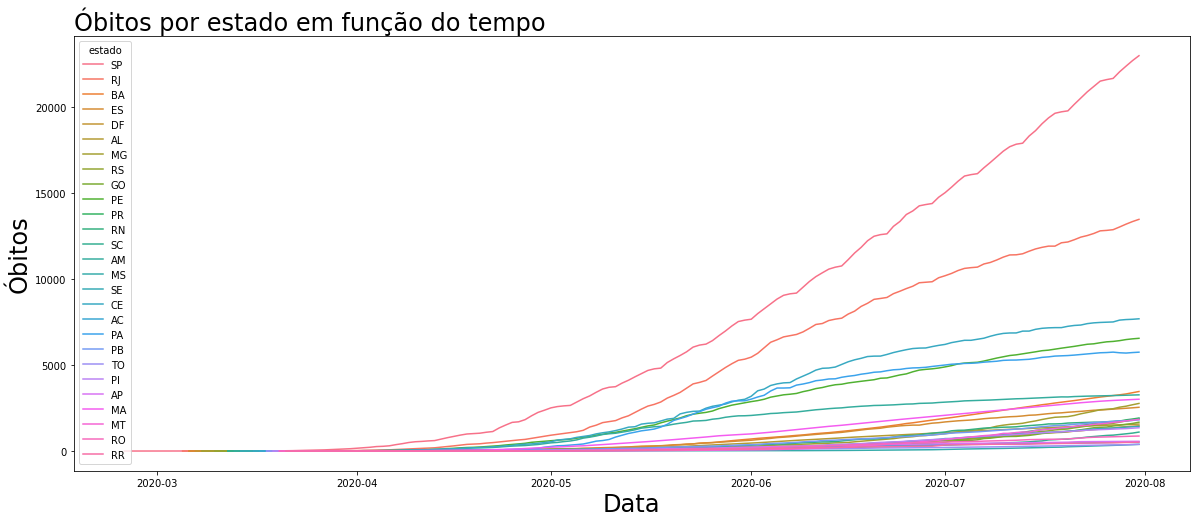

In [11]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo' , loc='left' , fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

In [12]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


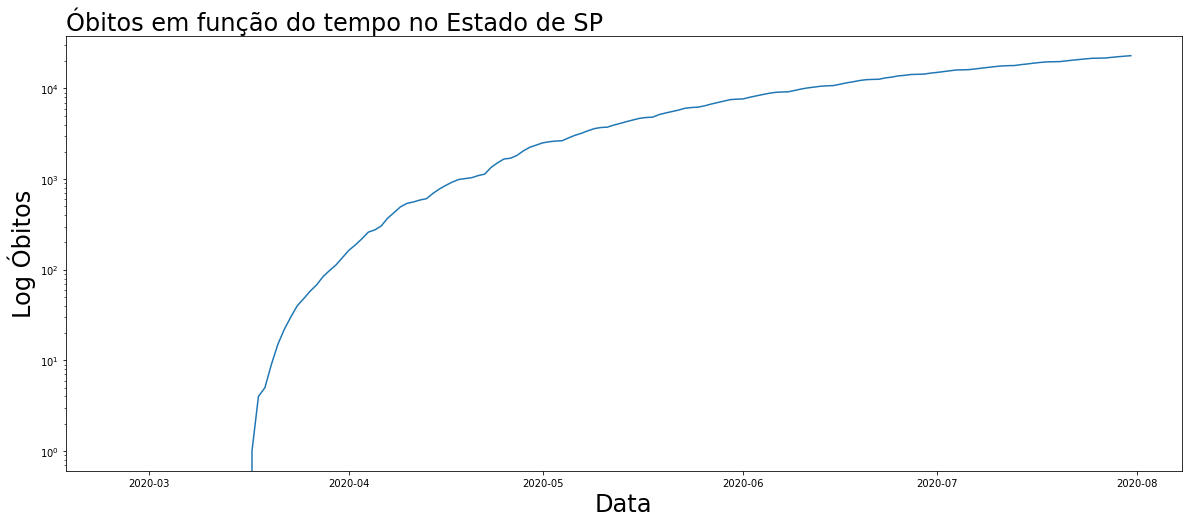

In [13]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',data=df_sp)
fig.set_title('Óbitos em função do tempo no Estado de SP', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Log Óbitos',fontsize=24)
fig.set_yscale('log')

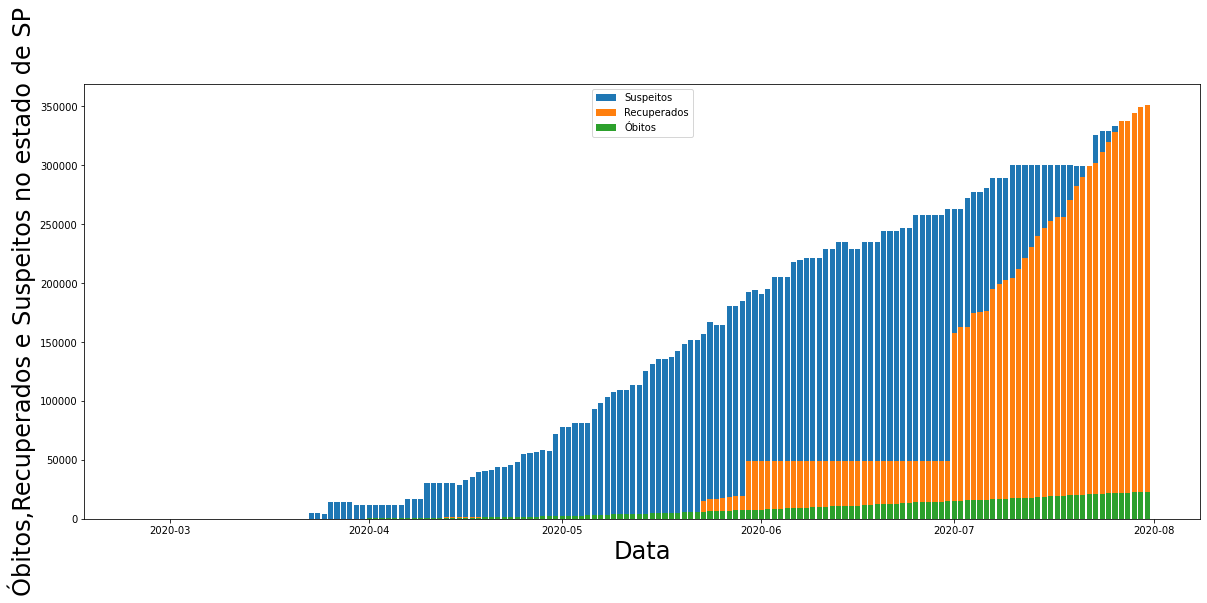

In [14]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data,df_sp.suspeitos,label='Suspeitos')
plt.bar(df_sp.data,df_sp.recuperados,label='Recuperados')
plt.bar(df_sp['data'],df_sp['Obitos'],label='Óbitos')
plt.xlabel('Data',fontsize=24)
plt.ylabel('Óbitos,Recuperados e Suspeitos no estado de SP',fontsize=24,rotation=90)
plt.legend()

In [15]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)

def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20, rotation=90)

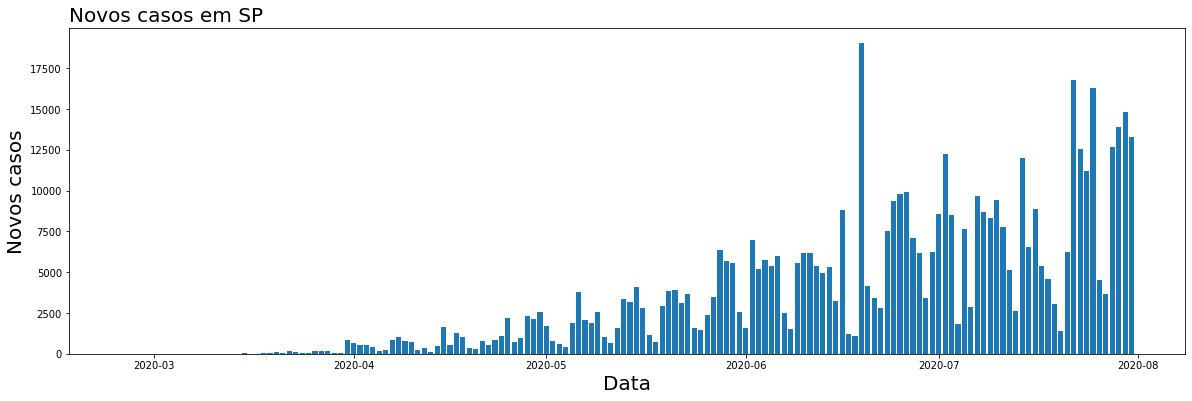

In [ ]:
plotar_barra('Novos casos em SP','Data','Novos casos','data','novosCasos',df_sp)

In [16]:
df_sp['AceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['AceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,AceleracaoCasos,AceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


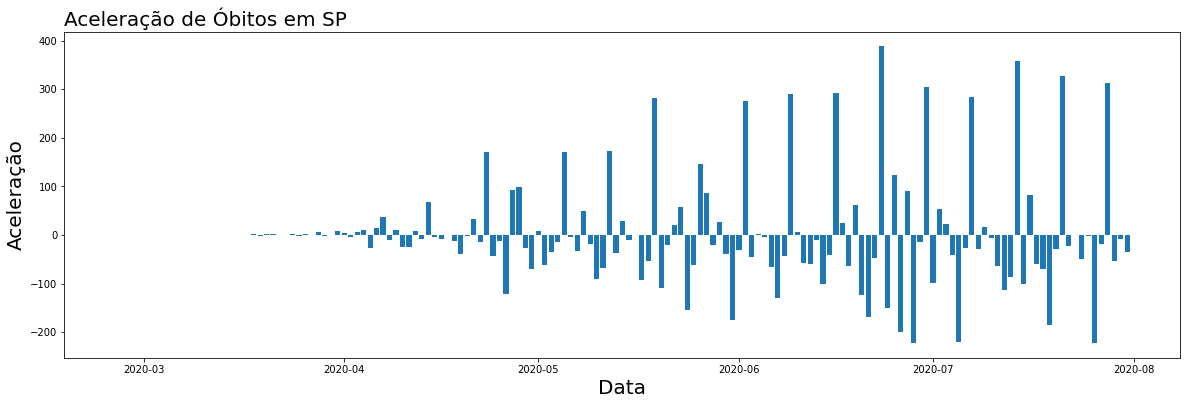

In [17]:
plotar_barra('Aceleração de Óbitos em SP','Data','Aceleração','data','AceleracaoObitos',df_sp)

<BarContainer object of 158 artists>

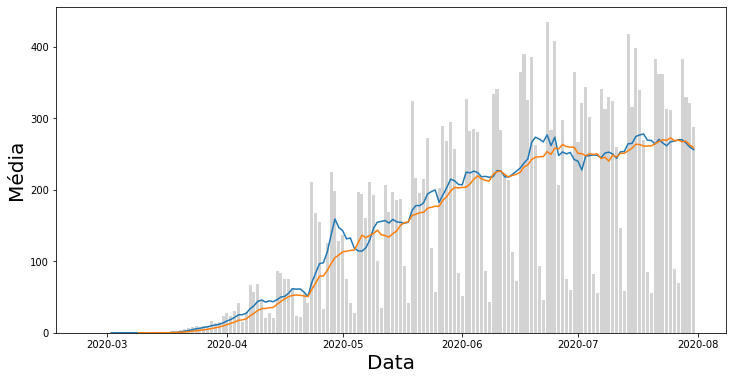

In [21]:
#MediaMovel
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
plotar_linha('Media móvel de óbitos em SP','Data','Média','data','mediaObitos',df_sp,None)
plotar_linha('Media móvel de óbitos em SP','Data','Média','data','mediaObitos_14',df_sp,None)
plt.bar(df_sp['data'],df_sp['novosObitos'],color='lightgrey')

